In [1]:
# import IT_PI is a module
import IT_PI
from scipy.special import erf
import numpy as np
from numpy.linalg import inv, matrix_rank
from pprint import pprint

In [2]:
def velocity_profile(y, nu, U, t):
    return U * (1 - erf(y / (2 * np.sqrt(nu * t))))

# Generate synthetic dataset
y_vals = np.linspace(0, 1, 20)
t_vals = np.linspace(5, 10, 20)
U = np.random.uniform(0.5, 1.0, 5)
nu = np.random.uniform(1e-3, 1e-2, 5)
u_array = []
params = []

for u0, n0 in zip(U, nu):
    for y in y_vals:
        for t in t_vals:
            u_array.append(velocity_profile(y, n0, u0, t))
            params.append([u0, y, t, n0])
u_array = np.array(u_array).reshape(-1, 1)
params = np.array(params)

In [3]:
# Define inputs and outputs
Y = u_array / params[:, 0].reshape(-1, 1)  # Output Pi_o = u/U
X = params                                 # Dimensional input list q
variables = ['U', 'y', 't', '\\nu']        # Variable names
D_in = np.matrix('1 1 0 2; -1 0 1 -1')     # Dimension matrix
num_input = 1

print("Rank of D_in:", matrix_rank(D_in))
print("D_in matrix:\n", D_in)
num_basis    = D_in.shape[1] - matrix_rank(D_in)
basis_matrices = IT_PI.calc_basis(D_in, num_basis)
print("Basis vectors:")
pprint(basis_matrices)


Rank of D_in: 2
D_in matrix:
 [[ 1  1  0  2]
 [-1  0  1 -1]]
Basis vectors:
matrix([[-1.,  1., -1.,  0.],
        [ 1.,  1.,  0., -1.]])


In [4]:
# Run IT_PI
results = IT_PI.main(
    X,
    Y,
    basis_matrices,
    num_input=num_input,
    estimator="kraskov",
    estimator_params={"k": 5},
    seed=42
)

------------------------------------------------------------
num of parameters: 2

Using estimator: 'kraskov' with hyperparameters: {'k': 5}

(150_w,300)-aCMA-ES (mu_w=78.0,w_1=3%) in dimension 2 (seed=42, Sun Sep  7 14:38:38 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    300 -3.436404557424770e+00 1.0e+00 7.98e-01  6e-01  7e-01 0:01.2
    2    600 -3.263877417816174e+00 1.9e+00 9.63e-01  4e-01  6e-01 0:02.6
    3    900 -4.068861016818221e+00 4.0e+00 9.53e-01  3e-01  3e-01 0:04.0
    5   1500 -4.246769834132689e+00 7.9e+00 1.51e+00  2e-01  2e-01 0:07.0
    8   2400 -4.244567841060381e+00 2.8e+01 2.57e+00  1e-01  1e-01 0:11.3
   12   3600 -4.273043656606752e+00 8.7e+01 3.64e+00  3e-02  3e-02 0:16.9
   17   5100 -4.273723673287241e+00 2.0e+02 5.10e+00  4e-03  4e-03 0:23.9
   22   6600 -4.274136909581288e+00 1.1e+02 7.37e+00  1e-03  1e-03 0:31.7
   28   8400 -4.274080327894084e+00 4.5e+01 7.93e+00  3e-04  3e-04 0:40.7
   34  10200 -4.27410697823765

Optimal_pi_lab[0] = $\frac{y^{1.0}}{t^{0.5} \cdot \nu^{0.5}}$


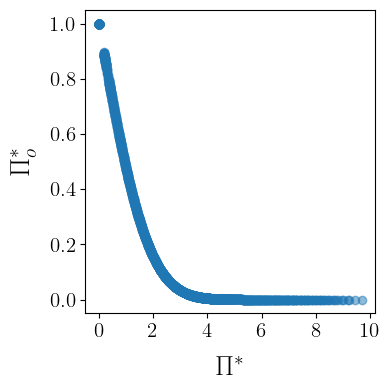

x_labels: ['${\\Pi}^*$']


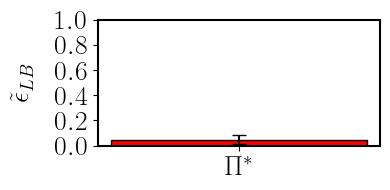

In [5]:
# Display results
coef_pi_list     = results["input_coef"]
variables        = ['U','y', 't','\\nu'];                       #Define variable name
optimal_pi_lab   = IT_PI.create_labels(np.array(coef_pi_list).reshape(-1, len(variables)), variables)
for j, label in enumerate(optimal_pi_lab):
    print(f'Optimal_pi_lab[{j}] = {label}')
input_PI = results["input_PI"]
output_PI = results["output_PI"]
epsilon  = results["irreducible_error"]
uq       = results["uncertainty"]

IT_PI.plot_scatter(input_PI,output_PI)
IT_PI.plot_error_bars(input_PI, epsilon,uq)